# Online Portfolio Selection: Pattern Matching

In this notebook, we will walk through the pattern matching strategies implemented in the online portfolio selection module.

In particular, we will take a look at
1. Nonparametric Log-Optimal: TBD
    - Histogram
    - Kernel-Based
    - Nearest-Neighbor
2. Correlation Driven Nonparametric Learning
    - CORN-U
    - CORN-K
    - SCORN-K
    - FCORN-K
3. Nonparametric Kernel-Based: TBD
    - Semi-Log-Optimal
    - Markowitz
    - GV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlfinlab.online_portfolio_selection import *



Support us on Patreon: https://www.patreon.com/HudsonThames

MlFinLab needs you! We need your help for us to keep on maintaining and implementing academic research based on 
financial machine learning (for open-source). In order for us to continue we need to raise $4000 of monthly donations
via Patreon - by December 2020. If we can't reach our goal, we will need to adopt more of a paid for service. We thought
that the best and least impactful course of action (should we not reach our goal) is to leave the package as open-source
but to make the documentation (ReadTheDocs) a paid for service. This is the ultimate litmus test, if the package is a 
value add, then we need the community to help us keep it going.

Our road map for 2020 is to implement the text book: Machine Learning for Asset Managers by Marcos Lopez de Prado, 
as well as a few papers from the Journal of Financial Data Science. We are hiring a full time developer for 3 months 
to help us reach our goals. The money that you

## Import Data

We will use the ETF data included in the mlfinlab library for analysis. This includes 23 ETF's with closing prices from 2008 to 2016

In [2]:
stock_prices = pd.read_csv('../tests/test_data/stock_prices.csv', parse_dates=True, index_col='Date')
stock_prices = stock_prices.dropna(axis=1)

In [3]:
stock_prices.head()

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE,...,XLU,EPP,FXI,VGK,VPL,SPY,TLT,BND,CSJ,DIA
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,49.273335,35.389999,106.639999,52.919998,78.220001,87.629997,37.939999,47.759998,41.299999,79.500000,...,42.090000,51.173328,55.983330,74.529999,67.309998,144.929993,94.379997,77.360001,101.400002,130.630005
2008-01-03,49.716667,35.290001,107.000000,53.119999,78.349998,87.809998,37.919998,48.060001,42.049999,80.440002,...,42.029999,51.293331,55.599998,74.800003,67.500000,144.860001,94.250000,77.459999,101.519997,130.740005
2008-01-04,48.223331,34.599998,106.970001,51.759998,76.570000,88.040001,36.990002,46.919998,40.779999,77.500000,...,42.349998,49.849998,54.536671,72.980003,65.769997,141.309998,94.269997,77.550003,101.650002,128.169998
2008-01-07,48.576668,34.630001,106.949997,51.439999,76.650002,88.199997,37.259998,47.060001,40.220001,77.199997,...,43.230000,50.416672,56.116669,72.949997,65.650002,141.190002,94.680000,77.570000,101.720001,128.059998
2008-01-08,48.200001,34.389999,107.029999,51.320000,76.220001,88.389999,36.970001,46.400002,39.599998,75.849998,...,43.240002,49.566669,55.326672,72.400002,65.360001,138.910004,94.570000,77.650002,101.739998,125.849998


## Pattern Matching

Pattern matching strategies make minimal assumptions about the market state but instead look at the similarities in previous market windows. Once the strategy identifies all the similar acting market window, the portfolio weights are optimzed to maximize those returns.

## 1. Nonparametric Log-Optimal: TBD

### 1.1 Histogram

$C_H(x^t_1,w)=\lbrace w < i < t+1 : G(x^t_{t-w+1}) = G(x^{i-1}_{i-w}) \rbrace$

### 1.2 Kernel-Based

$C_K(x^t_1,w)=\lbrace w < i < t+1 : \|x^t_{t-w+1}-x^{i-1}_{i-w} \leq \frac{c}{l} \rbrace$

### 1.3 Nearest-Neighbor

$C_N(x^t_1,w)=\lbrace w < i < t+1 : x^{i-1}_{i-w} \text{ is among the k NNs of } x^t_{t-w+1} \rbrace$

$TBD$

## 2. Correlation Driven Nonparametric Learning

Existing strategies attempt to exploit and identify the correlation between different market windows by using the Euclidean distance to measure the similarity between two market windows. However, traditional euclidean distance between windows do not effectively capture the linear or non-linear relation between the two. CORN resolves that problem by looking at the correlation coefficients between the two different market windows.

CORN formally defines a similar set to be one that satisfies the following equation:

$C_t(w,\rho) = \left\lbrace w < i < t+1 \bigg\vert \frac{cov(x^{i-1}_{i-w}, x^t_{t-w+1})}{std(x^{i-1}_{i-w})std(x^t_{t-w+1})} \geq \rho\right\rbrace$, where w is the window size and $\rho$ is the correlation coefficient

Each experts will have the following parameter: $\lbrace E(w,\rho) : w \geq 1, -1 \leqq \rho \geq 1\rbrace$

The next portfolio weight will be determined a the portfolio weight that maximizes returns in the given similar set.

$b_{t+1}(w,\rho) = \underset{b \in \Delta_m}{\arg \max} \underset{i \in C_t(w,\rho)}{\prod}(b \cdot x_i)$

After gathering results for all the experts, the total portfolio weight will be determined by:

$b_{t+1}=\frac{\sum_{w, \rho}q(w,\rho)S_t(w,\rho)b_{t+1}(w,\rho)}{\sum_{w, \rho}q(w,\rho)S_t(w,\rho)}$

CORN takes in a window variable that looks at the market window width and a rho variable that limits the selection of the similar set.

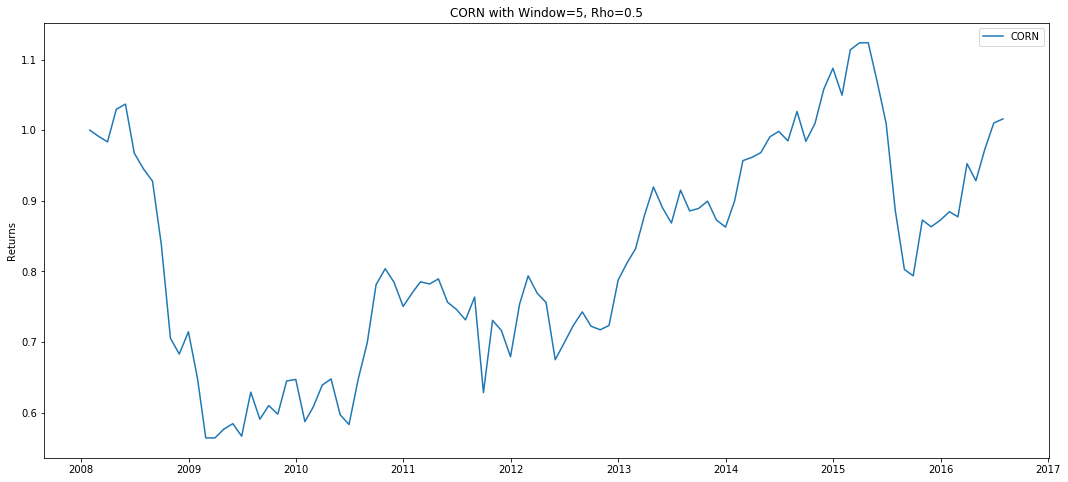

In [4]:
corn = CORN(window=10, rho=0.5)
corn.allocate(stock_prices, resample_by='M')
plt.figure(figsize=(18,8));
plt.plot(corn.portfolio_return, label = 'CORN');
plt.title('CORN with Window=5, Rho=0.5')
plt.ylabel('Returns')
plt.legend();

From the above graph, the current parameters do not seem to indicate any meaningful strategies.

Now, we will look at how different window values affect how CORN selection algorithm.

/Users/alexkwon/opt/anaconda3/envs/ht/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/alexkwon/opt/anaconda3/envs/ht/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


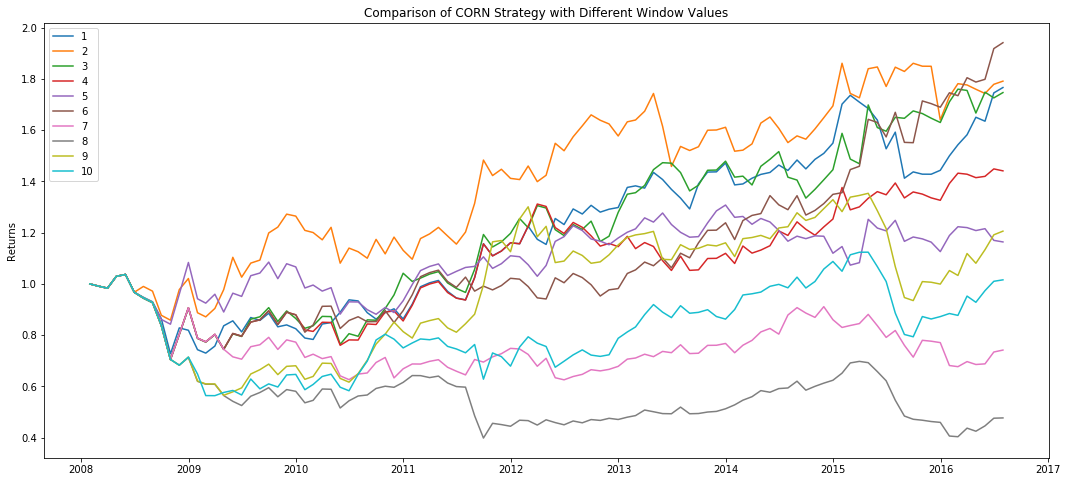

In [5]:
plt.figure(figsize=(18,8));
window_values = [1,2,3,4,5,6,7,8,9,10]
for w in window_values:
    strat = CORN(window=w, rho=0.5)
    strat.allocate(stock_prices, resample_by='M')
    plt.plot(strat.portfolio_return, label = str(w));
plt.title('Comparison of CORN Strategy with Different Window Values')
plt.ylabel('Returns')
plt.legend();

Our new graph indicates a much more interesting result. The highest achieving portfolio had a window of 5, with the close second place being 1, 2, and 3. Because, window value of 5 achieved the highest returns, now we will compare different rho values.

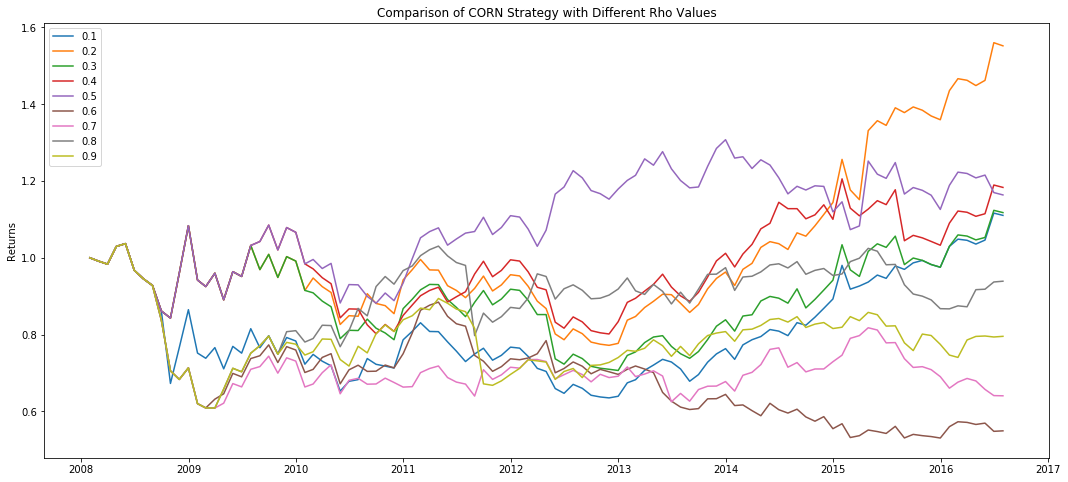

In [6]:
plt.figure(figsize=(18,8));
rho_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for r in rho_values:
    strat = CORN(window=5, rho=r)
    strat.allocate(stock_prices, resample_by='M')
    plt.plot(strat.portfolio_return, label = str(r));
plt.title('Comparison of CORN Strategy with Different Rho Values')
plt.ylabel('Returns')
plt.legend();

Different rho values produced mixed results. A general trend that we can identify is for the higher values of rho like 0.7, 0.8, and 0.9 returned the lowest results. The highest was achieved by a rho value of 0.2, which indicates that the similar sets should include a broad range of correlated market windows and not just limited to the highly correlated ones.

### 2.1 CORN-U

The U at the end of CORN indicates that we will be using a different number of experts for a single portfolio. It is similar to our analysis above, but instead of dividing into each portfolio component, CORN-U pools all the wealth of each experts and creates a uniform one.

However, in general, CORN-U is not an effective implementation, because of its even weight distribution even to the low-performing experts.

CORN_U takes in a set of window and rho values as its initial parameters.

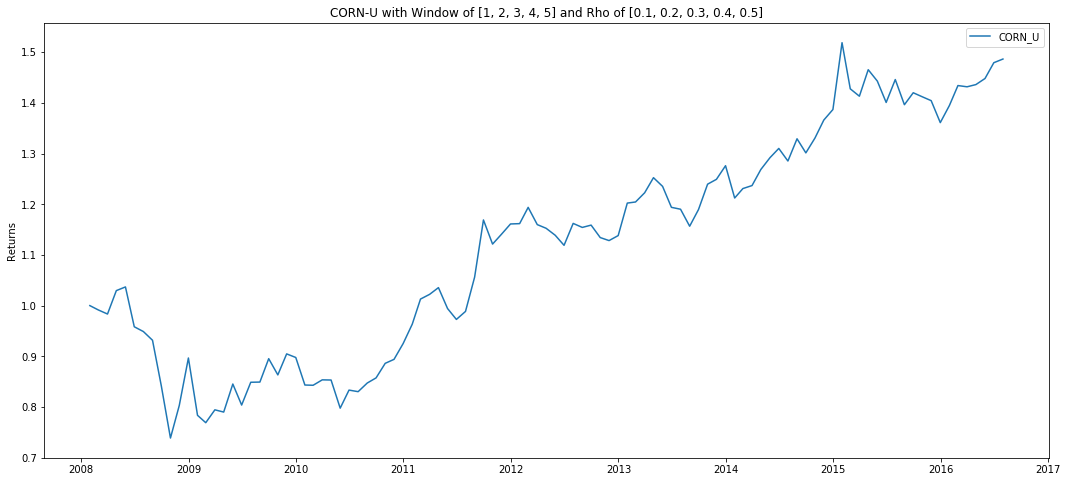

In [19]:
corn_u = CORN_U(window_values=[1,2,3,4,5], rho_values=[.1,.2,.3,.4,.5])
corn_u.allocate(stock_prices, resample_by='M')
plt.figure(figsize=(18,8));
plt.plot(corn_u.portfolio_return, label = 'CORN_U');
plt.title('CORN-U with Window of [1, 2, 3, 4, 5] and Rho of [0.1, 0.2, 0.3, 0.4, 0.5]')
plt.ylabel('Returns')
plt.legend();

CORN-U seems to provide a decent portfolio of weights over the 8 year period, reaching a high of 1.5 near the ends. However, due to the fact that it evenly allocates wealth among the experts. It will continue to reallocate wealth from the better performing experts to the less performing ones. The next strategy will attempt to improve on these faults.

### 2.2 CORN-K

CORN-K improves on the CORN-U on the wealth allocation to each experts. The overall portfolio manager chooses an arbitrary number k, where for each time period the top-k best performing experts of the last period get to continue their strategy.

CORN-K takes in three parameters. K determines the number of top experts for each time period. Window_values and Rho-values determine the each experts' unique parameters.

We will examine the same set of window and rho values as the above CORN-U strategy, but we will choose the top 2 experts to allocate our wealth.

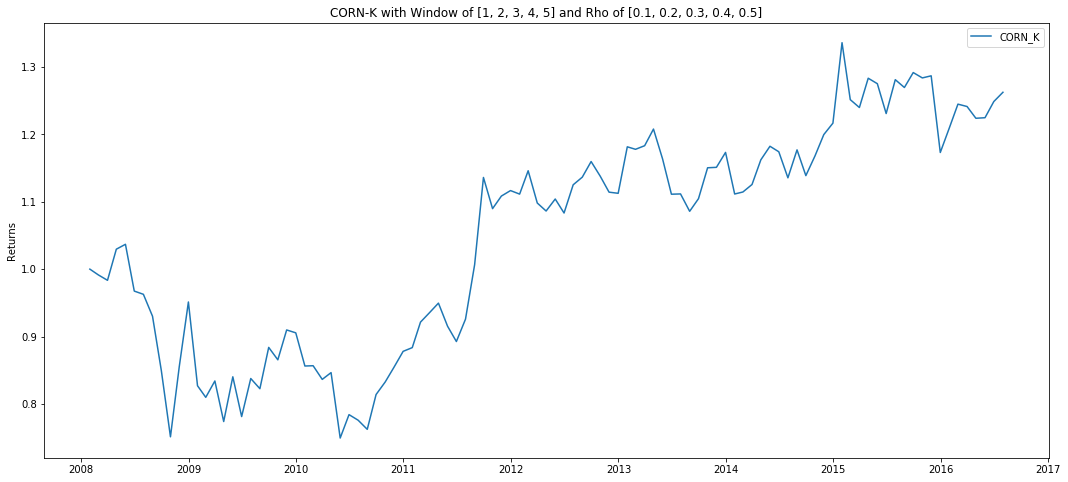

In [21]:
corn_k = CORN_K(k=5,window_values=[1,2,3,4,5], rho_values=[.1,.2,.3,.4,.5])
corn_k.allocate(stock_prices, resample_by='M')
plt.figure(figsize=(18,8));
plt.plot(corn_k.portfolio_return, label = 'CORN_K');
plt.title('CORN-K with Window of [1, 2, 3, 4, 5] and Rho of [0.1, 0.2, 0.3, 0.4, 0.5]')
plt.ylabel('Returns')
plt.legend();

The values for our certain parameter indicates that the current CORN-K strategy is less successful than the CORN-U. More parameters must be explored in order to have a better understanding of the market.

### 2.3 SCORN-K

CORN-K is based on CORN which looks periods of similar correlation. However, there is another perspetive in that markets are symmetrical. Some market windows might have high negative correlation. To this problem, we can formulate our problem to minimize the downsides formed in those negatively correlated periods.

We can define the positively correlated windows as: $C(x_t;w,\rho) = \lbrace x_j \vert R(X^{j-1}_{j-2},X^{t-1}_{t-w})  > \rho)$

We can define the negatively correlated windows as: $C'(x_t;w,\rho) = \lbrace x_j \vert R(X^{j-1}_{j-2},X^{t-1}_{t-w})  < -\rho)$

To maximize the returns for the positively correlated windows and minimize the losses for the negatively correlated windows, we can formulate the problem as

$b^{\bf{\star}}_t(w,\rho) = \underset{b \in \Delta_m}{\arg\max} \underset{x \in C(x_t;w,\rho)}{\sum}\log b^{\top}x - \underset{x \in C'(x_t;w,\rho)}{\sum}\log b^{\top}x$

SCORN-K takes in the same parameters as CORN-K, so we will use the same values as the above experiment.

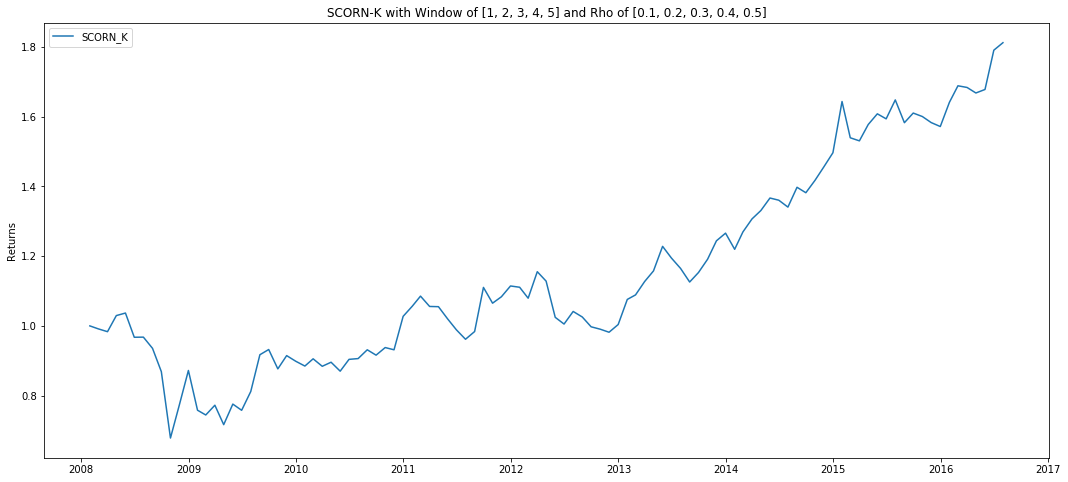

In [17]:
scorn_k = SCORN_K(k=2,window_values=[1,2,3,4,5], rho_values=[.1,.2,.3,.4,.5])
scorn_k.allocate(stock_prices, resample_by='M')
plt.figure(figsize=(18,8));
plt.plot(scorn_k.portfolio_return, label = 'SCORN_K');
plt.title('SCORN-K with Window of [1, 2, 3, 4, 5] and Rho of [0.1, 0.2, 0.3, 0.4, 0.5]')
plt.ylabel('Returns')
plt.legend();

With different parameters, we see a SCORN-K example that reaches 1.8 for the first time. This is a significant improvement from previous portfolio implementations. Different k-values and different window/rho values affect our portfolio results.

### 2.4 FCORN-K

FCORN-K is an extension of the SCORN-K algorithm. Instead of completely discounting windows with correlation that is less than a certain value, FCORN-K smoothes out the activation function for the log returns.

If we can formualte all CORN strategies to be in the following format

$b^{\bf{\star}}_t(w,\rho) = \underset{b \in \Delta_m}{\arg\max} \underset{j \in \lbrace1,...,t-1\rbrace}{\sum}v(j)\log b^{\top}x_i$

$\text{if} \: c \geq 0 \rightarrow v(j) =  \frac{1}{1 + \exp(-\lambda(c-\rho))}$

$\text{if} \: c < 0 \rightarrow v(j) =  \frac{1}{1 + \exp(-\lambda(c+\rho))} - 1$

Here, c is the correlation coefficient between the two windows, and the rest are the same variable as as above. Notice if $\lambda$ approaches $\infty$, the activation will become the SCORN-K one.

FCORN-K takes in an extra parameter $\lambda$, and we will test our strategies using different parameters.

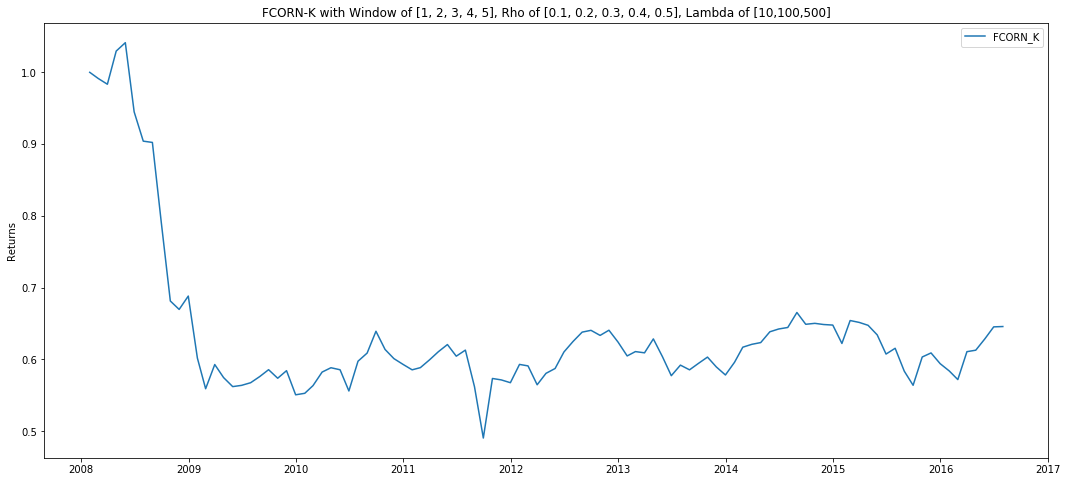

In [22]:
fcorn_k = FCORN_K(k=5,window_values=[1,2,3,4,5], rho_values=[.1,.2,.3,.4,.5],lambda_values=[10,100,500])
fcorn_k.allocate(stock_prices, resample_by='M')
plt.figure(figsize=(18,8));
plt.plot(fcorn_k.portfolio_return, label = 'FCORN_K');
plt.title('FCORN-K with Window of [1, 2, 3, 4, 5], Rho of [0.1, 0.2, 0.3, 0.4, 0.5], Lambda of [10,100,500]')
plt.ylabel('Returns')
plt.legend();

FCORN-K produced results that were disappointing as it never took off after the crash in 2009. More parameters must be explored to reach a conclusion.

## 3 Nonparametric Kernel-Based: TBD

### 3.1 Semi-Log-Optimal

### 3.2 Markowitz

### 3.3 GV